<a href="https://colab.research.google.com/github/prathamsss/Rotten-Fruit-Classification-and-Detection/blob/main/Fruitzy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
''' 
Detectro2 INstallation 

''' 

!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 4.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=e81c006c5f819d086840ffa3f3cebb33b96d19061c776cff382ad58636a754c3
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.9 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 703 kB/s 
     |████████████████████████████████| 145 kB 4.3 MB/s 
     |████████████████████████████████| 130 kB 42.4 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 743 kB 45.0 MB/s 
     |████████████████████████████████| 

In [2]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import os
import random
from detectron2.utils.visualizer import Visualizer
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from detectron2.data.catalog import Metadata


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog
i=0
from detectron2.utils.visualizer import Visualizer
import os

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


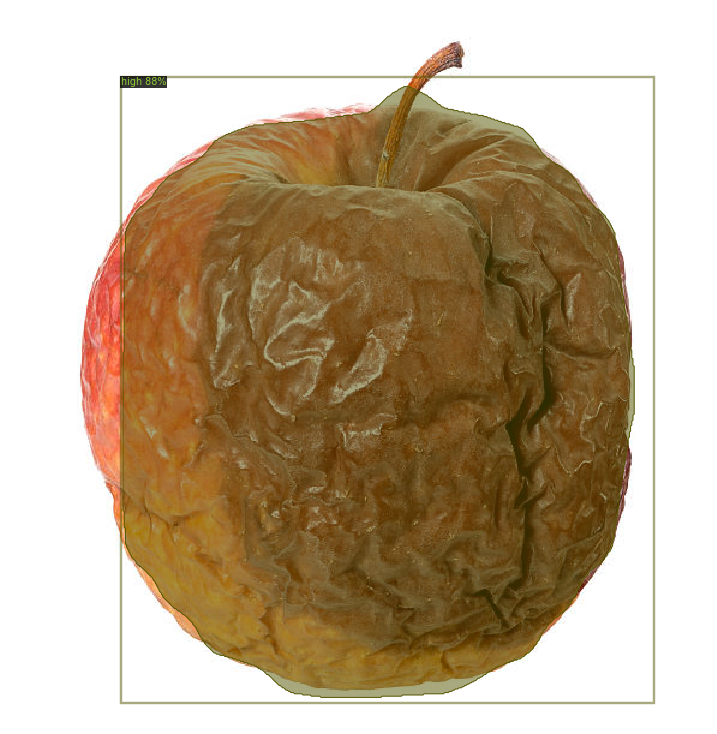

In [6]:
def predict(img):
    cfg_s = get_cfg()
    cfg_s.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_C4_1x.yaml"))
    cfg_s.MODEL.WEIGHTS = os.path.join(cfg_s.OUTPUT_DIR, "/content/drive/MyDrive/ML/fruit_quality/detection/output/model_final.pth")    # Mention path of saved weights file
    cfg_s.MODEL.ROI_HEADS.NUM_CLASSES = 2

    cfg_s.MODEL.RPN.NMS_THRESH = 0.23   # set the testing threshold for this model
    cfg_s.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

    predictor_single = DefaultPredictor(cfg_s)
    my_metadata_single = Metadata()

    my_metadata_single.set(thing_classes = ['low', 'high'])

    im = cv2.imread(img)
    outputs = predictor_single(im)
    v = Visualizer(im[:, :, ::-1], my_metadata_single, scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imwrite("rotten_fruit.bmp",v.get_image()[:, :, ::-1])
    cv2_imshow(v.get_image()[:, :, ::-1])

img= "/content/rotten_fruit.png"  # mention path of imges to predict
predict(img)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
